In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
import logging

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
    
aequ_dir = "/mnt/c/Users/jan.zill/code/aequilibrae"
if aequ_dir not in sys.path:
    sys.path.append(aequ_dir)

from aequilibrae import logger  # noqa: E402

import utils

In [4]:
stdout_handler = logging.StreamHandler(sys.stdout)
logger.addHandler(stdout_handler)

In [5]:
code_dir = "/mnt/c/Users/jan.zill/code"
tntp_dir = os.path.join(code_dir, "TransportationNetworks_aequilibrae")
scenario = "Anaheim" #"Berlin-Center" #
folder = os.path.join(tntp_dir, scenario)

if scenario == "Berlin-Center":
    link_file =  "berlin-center_net_clean.tntp" # DUPLICATE NODES REMOVED  "berlin-center_net_clean_bpr_altered.tntp" #
    trip_file =  "berlin-center_trips.tntp"
else:
    link_file =  f"{scenario}_net.tntp"
    trip_file =  f"{scenario}_trips.tntp"
    
# best_known_solution = list(filter(lambda x: "_flow.tntp" in x, os.listdir(folder)))
# if len(best_known_solution) == 1:
#     sol_file = best_known_solution[0]
# else:
#     sol_file = None
if scenario == "Anaheim":
    best_sol = pd.read_csv(os.path.join(folder, f"{scenario}_flow.tntp"), sep='\t', skiprows=5).rename(columns={"Tail ": "a_node", "Head ": "b_node", "Volume ": "flow_best"}).drop(columns=['~ ', ': ', '; ', 'Cost '])

In [8]:
block_centroids = True
r_gap = 1*1e-5

In [9]:
%%time
do_parallel = True
if do_parallel:
    method = "bush-based-parallel"
else:
    method = "bush-based"
path_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method=method, block_centroids=block_centroids, rgap=r_gap)

bush-based-parallel parallel Assignment STATS
 Initialised data structures, num nodes = 416, num links = 914
 0th iteration done, cost = 1296185.75
Iteration 1, computed gap: 0.004539900226943727, computed objective: 1291063.0, stepsize: 0.3639256612373998
Iteration 2, computed gap: 0.004271904416606742, computed objective: 1290732.625, stepsize: 0.11074628940128983
Iteration 3, computed gap: 0.0024690209387799866, computed objective: 1290648.875, stepsize: 0.4039855174804049
Iteration 4, computed gap: 0.0015412728313516366, computed objective: 1290611.25, stepsize: 0.3594246880039156
Iteration 5, computed gap: 0.001316435755192913, computed objective: 1290609.125, stepsize: 0.1419676461076447
Iteration 6, computed gap: 0.0001881720982754853, computed objective: 1290606.125, stepsize: 0.8730572775283294
Iteration 7, computed gap: 0.00014893539378368903, computed objective: 1290606.125, stepsize: 0.14790769029427847
Iteration 8, computed gap: 5.1594549286826386e-05, computed objective: 

In [10]:
%%time
bfw_rgap = r_gap #1e-5 #
bfw_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bfw", block_centroids=block_centroids, rgap=bfw_rgap)

bfw Assignment STATS
Iteration, RelativeGap, stepsize
1,inf,1.0
2,0.018135363369113977,0.2561015932062772
# Alert: Adding 0.3333333333333333 to stepsize to make it non-zero
3,0.0036265961074987314,0.3333333333333333
# Alert: Adding 0.25 to stepsize to make it non-zero
4,0.002300502121447229,0.25
# Alert: Adding 0.2 to stepsize to make it non-zero
5,0.0016660925434689557,0.2
# Alert: Adding 0.16666666666666666 to stepsize to make it non-zero
6,0.0013674148395812515,0.16666666666666666
# Alert: Adding 0.14285714285714285 to stepsize to make it non-zero
7,0.0011521665035996536,0.14285714285714285
# Alert: Adding 0.125 to stepsize to make it non-zero
8,0.0009970861455203498,0.125
# Alert: Adding 0.1111111111111111 to stepsize to make it non-zero
9,0.0008651833121821925,0.1111111111111111
# Alert: Adding 0.1 to stepsize to make it non-zero
10,0.0007703386571853957,0.1
# Alert: Adding 0.09090909090909091 to stepsize to make it non-zero
11,0.0007020823903876606,0.09090909090909091
# Alert: Ad

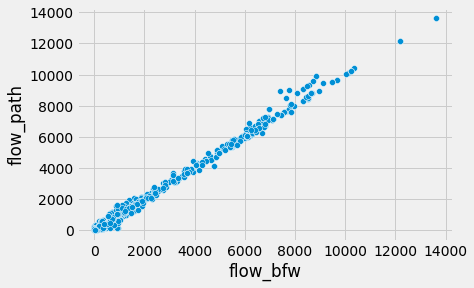

max diff in flow = 1510.039
max rel diff in flow = 1653.224%


,a_node,b_node,flow_bfw,flow_path,abs_change,rel_change
202,132,131,7411.694466,8921.733398,1510.038932,0.203737
201,131,130,7748.503715,8998.057617,1249.553902,0.161264
297,198,197,8832.653569,9930.384766,1097.731197,0.124281
296,197,196,8832.653569,9930.384766,1097.731197,0.124281
300,200,199,8702.861494,9599.129883,896.268389,0.102985
194,126,125,7621.919564,8477.782227,855.862662,0.112290
298,199,198,8458.218625,9279.220703,821.002078,0.097066
198,129,128,6984.583893,7781.694824,797.110931,0.114124
197,128,127,6984.583893,7781.694824,797.110931,0.114124
195,127,126,6984.583893,7781.694824,797.110931,0.114124


In [11]:
full_result = bfw_res_.drop(columns=['time']).merge(path_res_.drop(columns=['time']), on=['a_node', 'b_node'], how='outer', suffixes=['_bfw', '_path'])
sns.scatterplot(data=full_result, x='flow_bfw', y='flow_path');

#full_result = full_result.merge(best_sol, on=['a_node', 'b_node'], how='outer')
#sns.scatterplot(data=full_result, x='flow_best', y='flow_path');

plt.show();
full_result['abs_change'] = np.abs(full_result.flow_bfw - full_result.flow_path)
full_result['rel_change'] = full_result['abs_change'] / full_result['flow_bfw']
print(f"max diff in flow = {full_result['abs_change'].max():.3f}")
print(f"max rel diff in flow = {full_result['rel_change'].abs().max():.3f}%")
display(full_result[['a_node', 'b_node', 'flow_bfw', 'flow_path', 'abs_change', 'rel_change']].sort_values(by=['abs_change'], ascending=False).head(15))
#display(full_result[['a_node', 'b_node', 'flow_bfw', 'flow_path', 'flow_best', 'abs_change', 'rel_change']].sort_values(by=['abs_change'], ascending=False).head(15))